# FLIGHT PRICE PREDICTION

## Instructions:
1. We will have a dataset.
2. Find the cheapest and expensive flight at a specific time.
3. we have to go through EDA.
4. Machine Learning Model.
5. Find a sweet spotfor a cheap ticket.

### Problem Statement
- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his
brother’s wedding and is currently in the process of choosing tickets. Ahmed has to go to
Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait
instead of buy now, simply because ticket prices are just too high.

- Is this the right decision? Won’t ticket prices increase in the future? Perhaps there is a
sweet-spot Ahmed is hoping to find and maybe he just might find it.

- This is the problem that you will be tackling in this competition. Can you predict future prices
accurately to such a degree that you can now tell Ahmed - with confidence - that he has made
the wrong decision.

- Your task boils down to generating optimal predictions for flight prices of multiple airlines. If
successful, your model will contribute greatly to Sastaticket’s rich and diverse set of operating
algorithms.

Dataset X includes the following features:
- f1: Ticket Purchase Date Time
- f2: Origin
- f3: Destination
- f4: Departure Date Time
- f5: Arrival Date Time
- f6: Airline
- f7: Refundable Ticket
- f8: Baggage Weight
- f9: Baggage Pieces
- f10: Flight Number

## **1. Exploratory Data Analysis:**

We will extract information from our data.

In [1]:
# Import Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [66]:
# Load Dataset
x_train=pd.read_csv('https://raw.githubusercontent.com/Maryam-1/machinelearning_ka_chilla/master/Sastaticket_datasets/sastaticket_train.csv')
df=pd.read_csv('https://raw.githubusercontent.com/Maryam-1/machinelearning_ka_chilla/master/Sastaticket_datasets/sastaticket_test.csv')

In [3]:
x_train.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [4]:
x_test.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [5]:
# shape
x_train.shape
print("rows, cols:",x_train.shape)

rows, cols: (5000, 14)


In [6]:
# shape
x_test.shape

(250, 11)

In [7]:
#Structure
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   Unnamed: 0.1  5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.2  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [8]:
#Check null values
x_train.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [9]:
# Summary Statistics
x_train.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [10]:
# TO Check column names in x_train
print(x_train.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')


In [11]:
# finding unique values
cat_list=['f2','f3','f6','f8','f9','f10']

# unique values in each column
for i in cat_list:
    print(i, x_train[i].unique())
    print('...........................')

f2 ['x']
...........................
f3 ['y']
...........................
f6 ['gamma' 'alpha' 'beta' 'omega']
...........................
f8 [ 0. 35. 20. 15. 32. 40. 45.]
...........................
f9 [0 1 2]
...........................
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
...........................


As we have no categorical variables in f2 and f3 and we already know that He is going from Karachi to Islamabad so we donot
require these columns because they donot help prediction. On the other hand, f10 column which is flight number and it has many 
categories but flight number is not a such variable which helps in predicting flight prices so we will also drop this column.

In [12]:
x_train.drop(['Unnamed: 0', 'f2', 'f3', 'f10'],axis=1,inplace=True)

In [14]:
x_train.drop(['Unnamed: 0.1','Unnamed: 0.2'],axis=1,inplace=True)
x_train.head()

,f1,f4,f5,f6,f7,f8,f9,target
0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [15]:
#type casting
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      5000 non-null   object 
 1   f4      5000 non-null   object 
 2   f5      5000 non-null   object 
 3   f6      5000 non-null   object 
 4   f7      5000 non-null   bool   
 5   f8      5000 non-null   float64
 6   f9      5000 non-null   int64  
 7   target  5000 non-null   float64
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 278.4+ KB


Our main columns of time are in object form we will convert them into date and time objects

In [16]:
#convert them into date and time objects
from datetime import date, datetime

x_train['f1']=pd.to_datetime(x_train['f1'])
x_train['f4']=pd.to_datetime(x_train['f4'])
x_train['f5']=pd.to_datetime(x_train['f5'])

In [17]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      5000 non-null   datetime64[ns, UTC]
 1   f4      5000 non-null   datetime64[ns, UTC]
 2   f5      5000 non-null   datetime64[ns, UTC]
 3   f6      5000 non-null   object             
 4   f7      5000 non-null   bool               
 5   f8      5000 non-null   float64            
 6   f9      5000 non-null   int64              
 7   target  5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(1), object(1)
memory usage: 278.4+ KB


In [23]:
# adding column after subtraction
x_train.insert(0, "time_to_dept(s)",((x_train['f4']-x_train['f1']).astype('timedelta64[s]')), True)
x_train.insert(1, "travel_time(s)",((x_train['f5']-x_train['f4']).astype('timedelta64[s]')), True)

In [24]:
x_train.head()

,time_to_dept(s),travel_time(s),time_to_dept(s),travel_time(s),travel_time(s),time_to_dept(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,1268192.0,7200.0,7200.0,1268192.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,29688.0,7200.0,7200.0,29688.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,3033072.0,7200.0,7200.0,3033072.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,363011.0,7200.0,7200.0,363011.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2142368.0,6900.0,6900.0,2142368.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [27]:
x_train= x_train.loc[:,~x_train.columns.duplicated()]
x_train.head()


,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9,target
0,1268192.0,7200.0,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,6500.0


In [31]:
cat_cols=['f6','f7','f8','f9']
num_cols=['time_to_dept(s)','travel_time(s)']

C:\Users\ZS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZS\anaconda3\lib\site-packages\

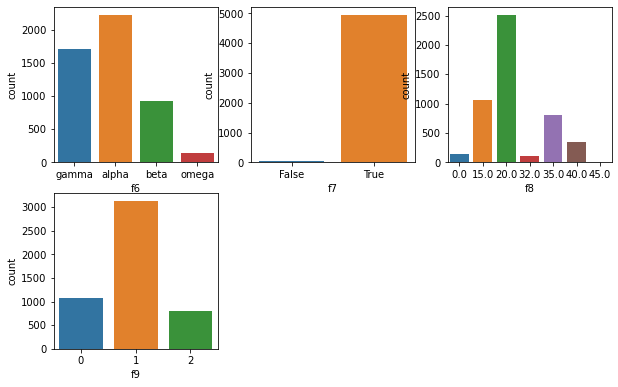

In [29]:
#plotting categorical count plot
c=1
plt.figure(figsize=(10,20))

for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(x_train[i])
    c=c+1
plt.show()

C:\Users\ZS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ZS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


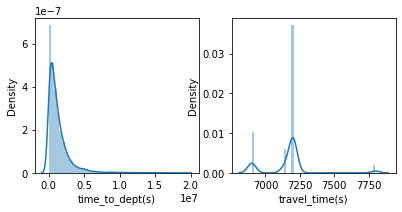

In [32]:
#plotting numerical distplot
c=1
plt.figure(figsize=(10,20))

for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(x_train[i])
    c=c+1
plt.show()

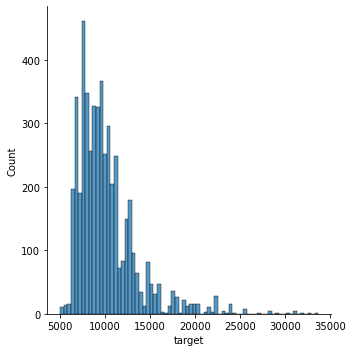

In [36]:
#target
sns.displot(x_train.target)


C:\Users\ZS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

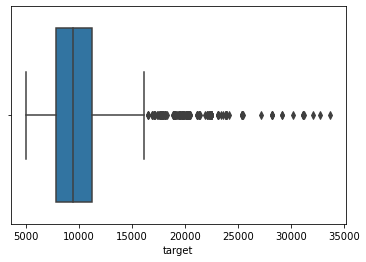

In [38]:
sns.boxplot(x_train.target)

In [39]:
x_train.skew()

time_to_dept(s)     3.703644
travel_time(s)      1.319374
f7                -11.660949
f8                  0.418300
f9                  0.027547
target              2.056345
dtype: float64

In [40]:
x_train.kurtosis()

time_to_dept(s)     20.796049
travel_time(s)       5.504109
f7                 134.031335
f8                   0.046374
f9                  -0.310364
target               6.344666
dtype: float64

In [42]:
x_train.drop(['f1','f4','f5'],axis=1,inplace=True)

In [43]:
x_train.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,gamma,True,0.0,0,7400.0
1,29688.0,7200.0,alpha,True,35.0,1,15377.0
2,3033072.0,7200.0,gamma,True,20.0,1,6900.0
3,363011.0,7200.0,alpha,True,15.0,1,9707.0
4,2142368.0,6900.0,beta,True,20.0,0,6500.0


In [44]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
x_train['f6']= le.fit_transform(x_train['f6'])
x_train['f7']= le.fit_transform(x_train['f7'])
x_train['f8']= le.fit_transform(x_train['f8'])

In [48]:
x_train.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,target
0,1268192.0,7200.0,2,1,0,0,7400.0
1,29688.0,7200.0,0,1,4,1,15377.0
2,3033072.0,7200.0,2,1,2,1,6900.0
3,363011.0,7200.0,0,1,1,1,9707.0
4,2142368.0,6900.0,1,1,2,0,6500.0


In [49]:
x_train.describe()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9,target
count,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.349212e+06,7159.836000,0.953400,0.992800,2.292000,0.944600,10104.351800
std,1.679384e+06,169.613345,0.948371,0.084555,1.247817,0.607951,3359.936118
min,2.003000e+03,6900.000000,0.000000,0.000000,0.000000,0.000000,4990.000000
25%,3.606870e+05,7140.000000,0.000000,1.000000,2.000000,1.000000,7796.000000
50%,8.634945e+05,7200.000000,1.000000,1.000000,2.000000,1.000000,9403.000000
75%,1.698816e+06,7200.000000,2.000000,1.000000,3.000000,1.000000,11245.000000
max,1.916464e+07,7800.000000,3.000000,1.000000,6.000000,2.000000,33720.000000


In [50]:
# Now we will use standard scalar to normalize our data:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x_train['time_to_dept(s)']=sc.fit_transform(x_train['time_to_dept(s)'])
x_train['travel_time(s)']=sc.fit_transform(x_train['travel_time(s)'])
x_train['target']=sc.fit_transform(x_train['target'])

In [51]:
x_train.columns

Index(['time_to_dept(s)', 'travel_time(s)', 'f6', 'f7', 'f8', 'f9', 'target'], dtype='object')

In [53]:
#Splitting the data into x and y
x= x_train.drop(['target'],axis=1)
y=x_train['target']


In [54]:
x.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9
0,1268192.0,7200.0,2,1,0,0
1,29688.0,7200.0,0,1,4,1
2,3033072.0,7200.0,2,1,2,1
3,363011.0,7200.0,0,1,1,1
4,2142368.0,6900.0,1,1,2,0


In [55]:
y.head()

0     7400.0
1    15377.0
2     6900.0
3     9707.0
4     6500.0
Name: target, dtype: float64

# ML Modelling

In [57]:
# Regression pipeline and algos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# RMSE
#rms= mean_absolute_error(y_test,y_pred, squared=False)

In [58]:
lr=LinearRegression()
dt= DecisionTreeRegressor()
svr= SVR()
knn=KNeighborsRegressor()

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=42)

for i in [lr,dt,svr,knn]:           #read all models
    i.fit(x_train,y_train)          # fitting our model
    pred=i.predict(x_test)          #predict
    test_score=r2_score(y_test, pred) #test_score
    train_score=r2_score(y_train, i.predict(x_train))  #train_score
    if abs(train_score-test_score)<= 0.1:
        print(i)
        print('R2 score is:', r2_score(y_test,pred))
        print('Mean Absolute Error:', mean_absolute_error(y_test,pred))
        print('Mean sq Error:', mean_squared_error(y_test,pred))
        print('RMSE is:', mean_squared_error(y_test,pred, squared=False))
        print('....................................................')
        
# to save prediction
res= pd.DataFrame(pred)
res.index=x_test.index
res.columns=['prediction']
res.to_csv('downloads/prediction_Results_with_traintestsplit.csv')

LinearRegression()
R2 score is: 0.08245769682272552
Mean Absolute Error: 2175.6552919422875
Mean sq Error: 9604880.48361756
RMSE is: 3099.174161549744
....................................................
SVR()
R2 score is: -0.06121290745272212
Mean Absolute Error: 2234.394635530172
Mean sq Error: 11108831.830924733
RMSE is: 3332.991423770054
....................................................


Now we are going to predict the train data onto the test data but before we have clean this data file similar to the 
train file

In [68]:
#x_test file
df.head()

,Unnamed: 0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10
0,2694449,2021-09-16 12:20:01.578279+00:00,x,y,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1,d-1
1,3088556,2021-09-18 20:13:13.612131+00:00,x,y,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1,d-5
2,3914899,2021-09-24 17:53:41.424953+00:00,x,y,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1,a-9
3,1139859,2021-09-07 19:39:07.182848+00:00,x,y,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0,b-1
4,594648,2021-09-05 03:48:20.099555+00:00,x,y,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1,a-1


In [69]:
df.drop(['Unnamed: 0','f2','f3','f10'],axis=1,inplace=True)

In [70]:
df.head()

,f1,f4,f5,f6,f7,f8,f9
0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


In [71]:
#type casting
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      250 non-null    object 
 1   f4      250 non-null    object 
 2   f5      250 non-null    object 
 3   f6      250 non-null    object 
 4   f7      250 non-null    bool   
 5   f8      250 non-null    float64
 6   f9      250 non-null    int64  
dtypes: bool(1), float64(1), int64(1), object(4)
memory usage: 12.1+ KB


In [72]:
#convert them into date and time objects
from datetime import date, datetime

df['f1']=pd.to_datetime(df['f1'])
df['f4']=pd.to_datetime(df['f4'])
df['f5']=pd.to_datetime(df['f5'])

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   f1      250 non-null    datetime64[ns, UTC]
 1   f4      250 non-null    datetime64[ns, UTC]
 2   f5      250 non-null    datetime64[ns, UTC]
 3   f6      250 non-null    object             
 4   f7      250 non-null    bool               
 5   f8      250 non-null    float64            
 6   f9      250 non-null    int64              
dtypes: bool(1), datetime64[ns, UTC](3), float64(1), int64(1), object(1)
memory usage: 12.1+ KB


In [74]:
# adding column after subtraction
df.insert(0, "time_to_dept(s)",((df['f4']-df['f1']).astype('timedelta64[s]')), True)
df.insert(1, "travel_time(s)",((df['f5']-df['f4']).astype('timedelta64[s]')), True)

In [75]:
df.head()

,time_to_dept(s),travel_time(s),f1,f4,f5,f6,f7,f8,f9
0,1441198.0,7200.0,2021-09-16 12:20:01.578279+00:00,2021-10-03 04:40:00+00:00,2021-10-03 06:40:00+00:00,omega,True,20.0,1
1,420706.0,7200.0,2021-09-18 20:13:13.612131+00:00,2021-09-23 17:05:00+00:00,2021-09-23 19:05:00+00:00,omega,True,20.0,1
2,4043178.0,7200.0,2021-09-24 17:53:41.424953+00:00,2021-11-10 13:00:00+00:00,2021-11-10 15:00:00+00:00,alpha,True,20.0,1
3,465652.0,6900.0,2021-09-07 19:39:07.182848+00:00,2021-09-13 05:00:00+00:00,2021-09-13 06:55:00+00:00,beta,True,40.0,0
4,1469499.0,7200.0,2021-09-05 03:48:20.099555+00:00,2021-09-22 04:00:00+00:00,2021-09-22 06:00:00+00:00,alpha,True,20.0,1


In [76]:
df.drop(['f1','f4','f5'],axis=1,inplace=True)

In [77]:
df.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9
0,1441198.0,7200.0,omega,True,20.0,1
1,420706.0,7200.0,omega,True,20.0,1
2,4043178.0,7200.0,alpha,True,20.0,1
3,465652.0,6900.0,beta,True,40.0,0
4,1469499.0,7200.0,alpha,True,20.0,1


In [78]:
# Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [79]:
df['f6']= le.fit_transform(df['f6'])
df['f7']= le.fit_transform(df['f7'])
df['f8']= le.fit_transform(df['f8'])

In [80]:
df.head()

,time_to_dept(s),travel_time(s),f6,f7,f8,f9
0,1441198.0,7200.0,3,0,1,1
1,420706.0,7200.0,3,0,1,1
2,4043178.0,7200.0,0,0,1,1
3,465652.0,6900.0,1,0,2,0
4,1469499.0,7200.0,0,0,1,1


In [81]:
# Final Data Prediction
lr=LinearRegression().fit(x,y)
lr.predict(df)

array([ 9858.66444144, 10163.59815744,  9177.05433143,  9660.03998812,
        9946.09661815, 10192.05358172, 10221.05194467,  9693.52225485,
        9540.32898855, 10187.14823681,  9108.57450895,  9648.21277006,
       10111.11276788,  9442.82687284,  9810.79350666,  9420.31269756,
       10033.03821992, 11036.17072024, 11214.42492365, 10188.69637397,
       10759.23170823,  9491.35190378,  8511.68945647,  9201.39123625,
       10237.26368472,  8950.69879589,  9755.64495602, 10378.44611579,
        9782.73695448, 10223.3585385 ,  9418.8659727 ,  8083.32160863,
        9644.72560517,  9698.53898419,  9313.03225733, 10172.19486339,
       11349.95046751,  9981.22565891, 10094.38386252,  9650.77925337,
        7520.67845352, 10645.20024612,  9509.9805998 , 10184.77209578,
        9174.0703954 ,  9425.13634887,  9630.210932  , 10039.15830512,
       10142.13161173,  9926.03687224,  9869.03383875,  9776.45696993,
        9676.06574594, 10265.82399148, 10921.86435248,  9034.73804879,
      

In [82]:
import pickle

In [84]:
file=open('FLight price prediction.pkl','wb')
pickle.dump(df,file)